<a href="https://colab.research.google.com/github/suhui3/Banking-Management-System/blob/master/LinearReg_Transportation_Datasets_ModelSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import math

from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Acquire Dataset

In [88]:
!git clone https://github.com/Xin-overclocked/WIA1006_ML.git

fatal: destination path 'WIA1006_ML' already exists and is not an empty directory.


In [89]:
data = pd.read_csv('/content/WIA1006_ML/Fuel2015to2019.csv',encoding='utf-8')

# Data Preprocessing

In [90]:
data.head()

,Année modèle,Marque,Modèle,Catégorie de véhicule,Cylindrée (L),Cylindres,Transmission,Type de carburant,Ville (L/100 km),Route (L/100 km),Combinée (L/100 km),Combinée (mi/gal),Émissions de CO2 (g/km),Indice de CO2,Indice de smog
0,2015,Acura,ILX,Compacte,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compacte,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compacte,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Année modèle             5431 non-null   int64  
 1   Marque                   5431 non-null   object 
 2   Modèle                   5431 non-null   object 
 3   Catégorie de véhicule    5431 non-null   object 
 4   Cylindrée (L)            5431 non-null   float64
 5   Cylindres                5431 non-null   int64  
 6   Transmission             5431 non-null   object 
 7   Type de carburant        5431 non-null   object 
 8   Ville (L/100 km)         5431 non-null   float64
 9   Route (L/100 km)         5431 non-null   float64
 10  Combinée (L/100 km)      5431 non-null   float64
 11  Combinée (mi/gal)        5431 non-null   int64  
 12  Émissions de CO2 (g/km)  5431 non-null   int64  
 13  Indice de CO2            4303 non-null   float64
 14  Indice de smog          

In [92]:
english_column_names = {
    'Année modèle': 'Model_Year',
    'Marque': 'Brand',
    'Modèle': 'Model',
    'Catégorie de véhicule': 'Vehicle_Category',
    'Cylindrée (L)': 'Displacement_(L)',
    'Cylindres': 'Cylinders',
    'Transmission': 'Transmission',
    'Type de carburant': 'Fuel_Type',
    'Ville (L/100 km)': 'City_(L/100km)',
    'Route (L/100 km)': 'Highway_(L/100km)',
    'Combinée (L/100 km)': 'Combined_(L/100km)',
    'Combinée (mi/gal)': 'Combined_(mi/gal)',
    'Émissions de CO2 (g/km)': 'CO2_Emissions_(g/km)',
    'Indice de CO2': 'CO2_Index',
    'Indice de smog': 'Smog_Index',
}

data.rename(columns=english_column_names, inplace=True)
print(data.columns)

Index(['Model_Year', 'Brand', 'Model', 'Vehicle_Category', 'Displacement_(L)',
       'Cylinders', 'Transmission', 'Fuel_Type', 'City_(L/100km)',
       'Highway_(L/100km)', 'Combined_(L/100km)', 'Combined_(mi/gal)',
       'CO2_Emissions_(g/km)', 'CO2_Index', 'Smog_Index'],
      dtype='object')


In [93]:
data.head(5)

,Model_Year,Brand,Model,Vehicle_Category,Displacement_(L),Cylinders,Transmission,Fuel_Type,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km),CO2_Index,Smog_Index
0,2015,Acura,ILX,Compacte,2.0,4,AS5,Z,9.7,6.7,8.3,34,191,NaN,NaN
1,2015,Acura,ILX,Compacte,2.4,4,M6,Z,10.8,7.4,9.3,30,214,NaN,NaN
2,2015,Acura,ILX Hybrid,Compacte,1.5,4,AV7,Z,6.0,6.1,6.1,46,140,NaN,NaN
3,2015,Acura,MDX SH-AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,NaN,NaN
4,2015,Acura,RDX AWD,Véhicule utilitaire sport : petit,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,NaN,NaN


In [94]:
unique_vehicle_categories = data['Vehicle_Category'].unique()

print(unique_vehicle_categories)

['Compacte' 'Véhicule utilitaire sport : petit' 'Intermédiaire'
 'Deux places' 'Minicompacte' 'Sous-compacte' 'Familiale : petite'
 'Grande berline' 'Véhicule utilitaire sport : ordinaire'
 'Véhicule à usage spécial' 'Camionnette : petite' 'Fourgon : passager'
 'Camionnette : ordinaire' 'Fourgonnette' 'Familiale : intermédiaire']


In [95]:
translation_dict = {
    'Compacte': 'Compact',
    'Véhicule utilitaire sport : petit': 'Small SUV',
    'Intermédiaire': 'Intermediate',
    'Deux places': 'Two-seater',
    'Minicompacte': 'Subcompact',
    'Sous-compacte': 'Subcompact',
    'Familiale : petite': 'Small Family',
    'Grande berline': 'Large Sedan',
    'Véhicule utilitaire sport : ordinaire': 'Regular SUV',
    'Véhicule à usage spécial': 'Special Purpose Vehicle',
    'Camionnette : petite': 'Small Pickup Truck',
    'Fourgon : passager': 'Passenger Van',
    'Camionnette : ordinaire': 'Regular Pickup Truck',
    'Fourgonnette': 'Van',
    'Familiale : intermédiaire': 'Intermediate Family'
}

data['Vehicle_Category'] = data['Vehicle_Category'].replace(translation_dict)

# Print the unique values in the 'Vehicle Category' column after translation
print(data['Vehicle_Category'].unique())

['Compact' 'Small SUV' 'Intermediate' 'Two-seater' 'Subcompact'
 'Small Family' 'Large Sedan' 'Regular SUV' 'Special Purpose Vehicle'
 'Small Pickup Truck' 'Passenger Van' 'Regular Pickup Truck' 'Van'
 'Intermediate Family']


In [96]:
print('--Columns and the number of missing values--')
data.isna().sum()

--Columns and the number of missing values--


Model_Year                 0
Brand                      0
Model                      0
Vehicle_Category           0
Displacement_(L)           0
Cylinders                  0
Transmission               0
Fuel_Type                  0
City_(L/100km)             0
Highway_(L/100km)          0
Combined_(L/100km)         0
Combined_(mi/gal)          0
CO2_Emissions_(g/km)       0
CO2_Index               1128
Smog_Index              2234
dtype: int64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5431 entries, 0 to 5430
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model_Year            5431 non-null   int64  
 1   Brand                 5431 non-null   object 
 2   Model                 5431 non-null   object 
 3   Vehicle_Category      5431 non-null   object 
 4   Displacement_(L)      5431 non-null   float64
 5   Cylinders             5431 non-null   int64  
 6   Transmission          5431 non-null   object 
 7   Fuel_Type             5431 non-null   object 
 8   City_(L/100km)        5431 non-null   float64
 9   Highway_(L/100km)     5431 non-null   float64
 10  Combined_(L/100km)    5431 non-null   float64
 11  Combined_(mi/gal)     5431 non-null   int64  
 12  CO2_Emissions_(g/km)  5431 non-null   int64  
 13  CO2_Index             4303 non-null   float64
 14  Smog_Index            3197 non-null   float64
dtypes: float64(6), int64(

### One-hot encoding

In [98]:
data_encoded = pd.get_dummies(data)

In [99]:
data.shape

(5431, 15)

### Check Categorical Data / Numerical Data

In [100]:
import pandas as pd

# Assuming your DataFrame is named 'data'
unique_values_table = []

for column in data.columns:
    unique_values = data[column].unique()
    unique_values_count = len(unique_values)
    unique_values_table.append({'Feature': column, 'Unique_Values_Count': unique_values_count,})

unique_values_df = pd.DataFrame(unique_values_table)

unique_values_df

,Feature,Unique_Values_Count
0,Model_Year,5
1,Brand,41
2,Model,1357
3,Vehicle_Category,14
4,Displacement_(L),49
5,Cylinders,8
6,Transmission,27
7,Fuel_Type,5
8,City_(L/100km),194
9,Highway_(L/100km),126


Categorical Data


*   Brand
*   Vehicle Category
*   Cylinders
*   Fuel Type
- Transmission


In [101]:
data_cleaned = data.drop(columns=['CO2_Index', 'Smog_Index'])

# Print the first few rows of the cleaned DataFrame to verify
print(data_cleaned.head())

   Model_Year  Brand       Model Vehicle_Category  Displacement_(L)  \
0        2015  Acura         ILX          Compact               2.0   
1        2015  Acura         ILX          Compact               2.4   
2        2015  Acura  ILX Hybrid          Compact               1.5   
3        2015  Acura  MDX SH-AWD        Small SUV               3.5   
4        2015  Acura     RDX AWD        Small SUV               3.5   

   Cylinders Transmission Fuel_Type  City_(L/100km)  Highway_(L/100km)  \
0          4          AS5         Z             9.7                6.7   
1          4           M6         Z            10.8                7.4   
2          4          AV7         Z             6.0                6.1   
3          6          AS6         Z            12.7                9.1   
4          6          AS6         Z            12.1                8.7   

   Combined_(L/100km)  Combined_(mi/gal)  CO2_Emissions_(g/km)  
0                 8.3                 34                   191 

In [102]:
# Generate descriptive statistics for the DataFrame (e.g., min, max, mean, std deviation, and quartiles).
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Model_Year,5431.0,2016.969251,1.418106,2015.0,2016.0,2017.0,2018.0,2019.0
Displacement_(L),5431.0,3.124084,1.340291,0.9,2.0,3.0,3.6,8.4
Cylinders,5431.0,5.574664,1.824908,3.0,4.0,6.0,6.0,16.0
City_(L/100km),5431.0,12.448702,3.373358,4.2,10.0,12.0,14.4,30.6
Highway_(L/100km),5431.0,8.953876,2.106854,4.0,7.4,8.6,10.1,20.6
Combined_(L/100km),5431.0,10.875640,2.769807,4.1,8.9,10.5,12.5,26.1
Combined_(mi/gal),5431.0,27.640582,7.110266,11.0,23.0,27.0,32.0,69.0
CO2_Emissions_(g/km),5431.0,249.202357,57.323708,96.0,207.0,244.0,286.0,522.0
CO2_Index,4303.0,4.798048,1.643458,1.0,4.0,5.0,6.0,10.0
Smog_Index,3197.0,4.647169,1.840989,1.0,3.0,5.0,6.0,8.0


In [103]:
train,test = train_test_split(data, test_size = 0.2, random_state = 42)

In [104]:
print('The dimension of the train synthetic dataset is:', train.shape)
print('The dimension of the test synthetic dataset is:', test.shape)
print('The dimension of the orginal dataset is:', data.shape)

The dimension of the train synthetic dataset is: (4344, 15)
The dimension of the test synthetic dataset is: (1087, 15)
The dimension of the orginal dataset is: (5431, 15)


In [105]:
data.duplicated().sum()

0

# EDA

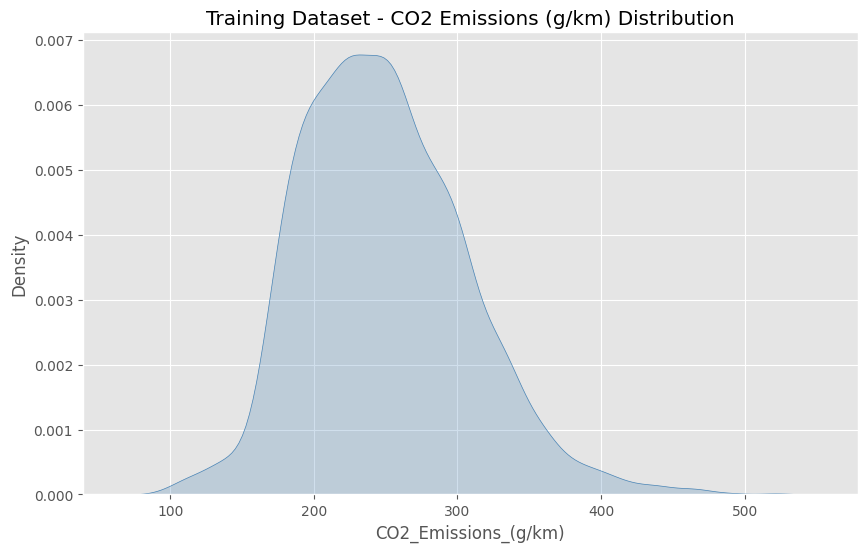

In [106]:
# Create a single plot
plt.figure(figsize=(10, 6))

# Plot the kernel density plot for the '' feature of the training dataset
sns.kdeplot(data=train, x='CO2_Emissions_(g/km)', fill=True, color='steelblue')
plt.title('Training Dataset - CO2 Emissions (g/km) Distribution')

# Show the plot
plt.show()

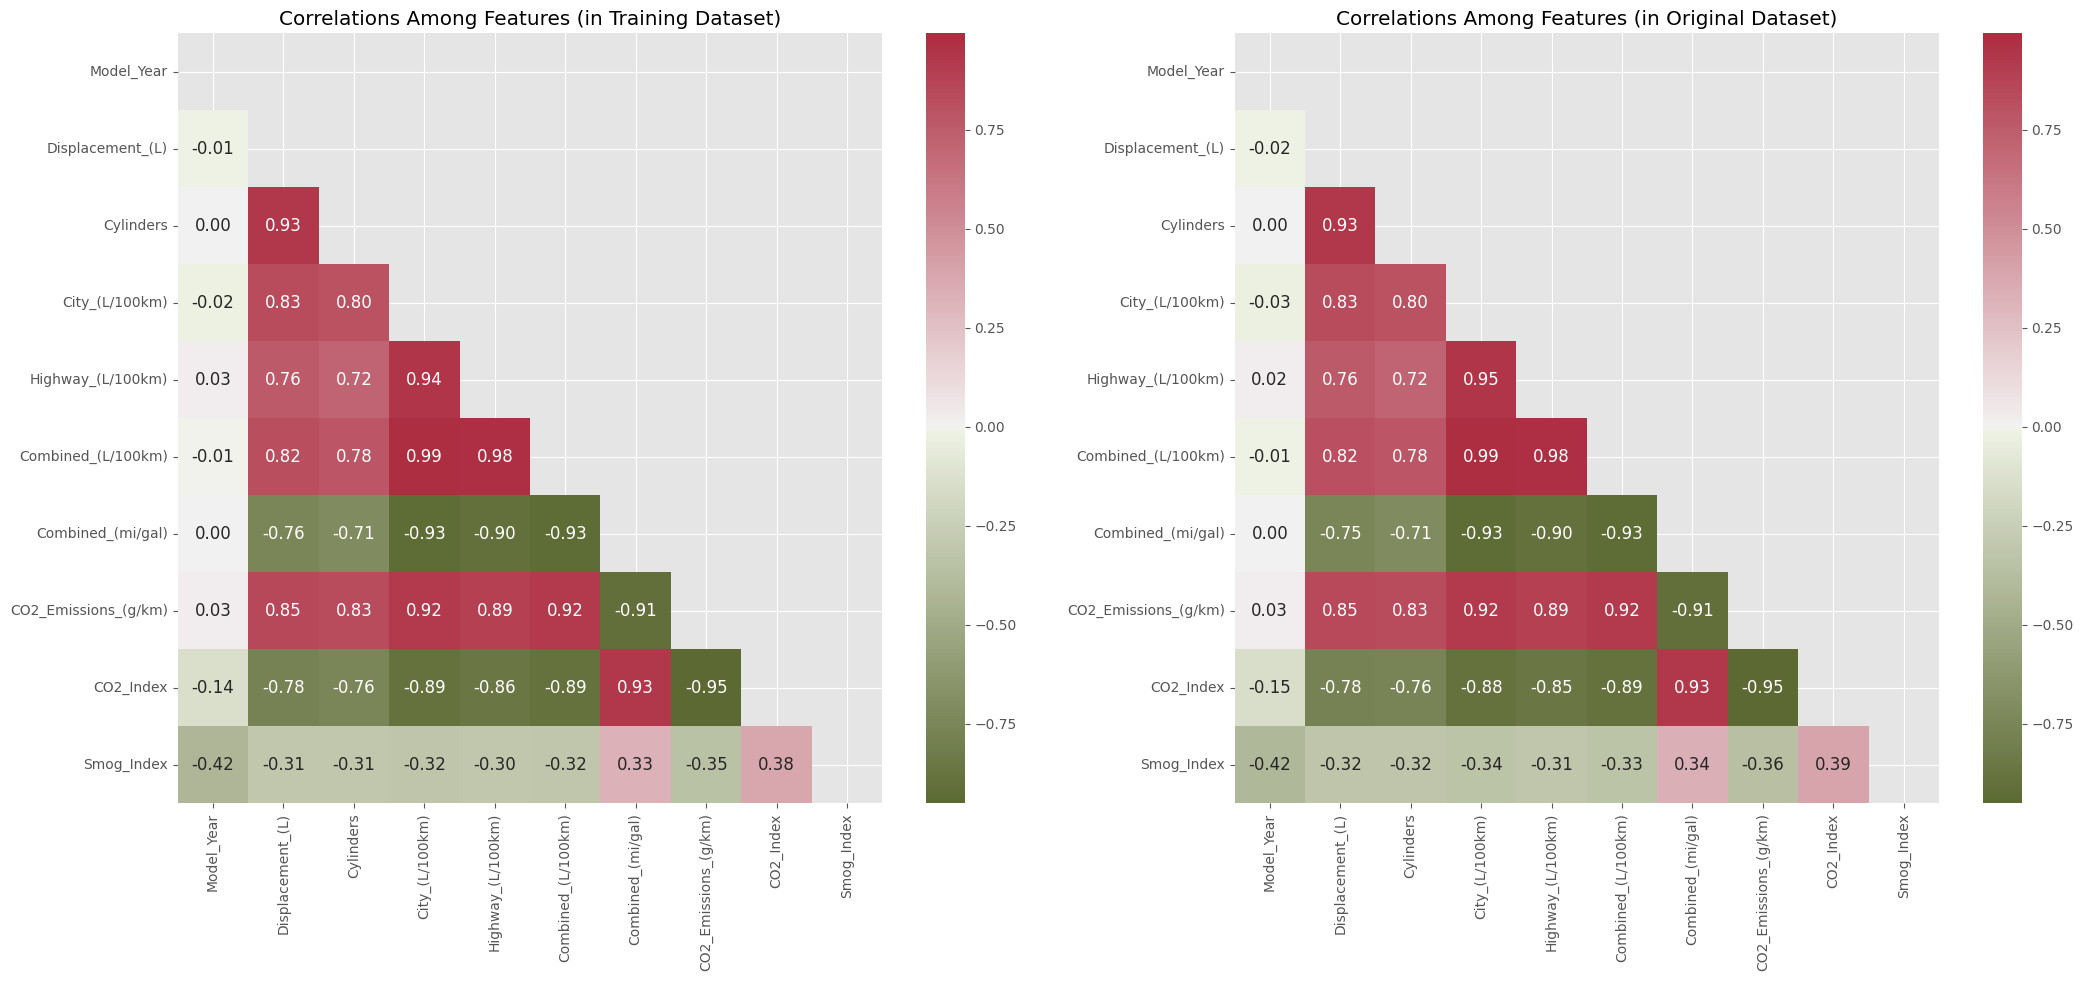

In [107]:
train_numeric = train.select_dtypes(exclude=['object'])
data_numeric = data.select_dtypes(exclude=['object'])

corr_mat_data = train_numeric.corr()
corr_mat_original = data_numeric.corr()

data_mask = np.triu(np.ones_like(corr_mat_data, dtype=bool))
original_mask = np.triu(np.ones_like(corr_mat_original, dtype=bool))

cmap = sns.diverging_palette(100, 7, s=75, l=40, n=20, center='light', as_cmap=True)

fig, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(corr_mat_data, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, ax=axes[0], mask=data_mask).set_title('Correlations Among Features (in Training Dataset)')
sns.heatmap(corr_mat_original, annot=True, cmap=cmap, fmt='.2f', center=0,
            annot_kws={'size': 12}, ax=axes[1], mask=original_mask).set_title('Correlations Among Features (in Original Dataset)');

Least related is model year. Most related is 'City (L/100 km)', 'Combined (L/100 km)', 'Combined (mi/gal)'.

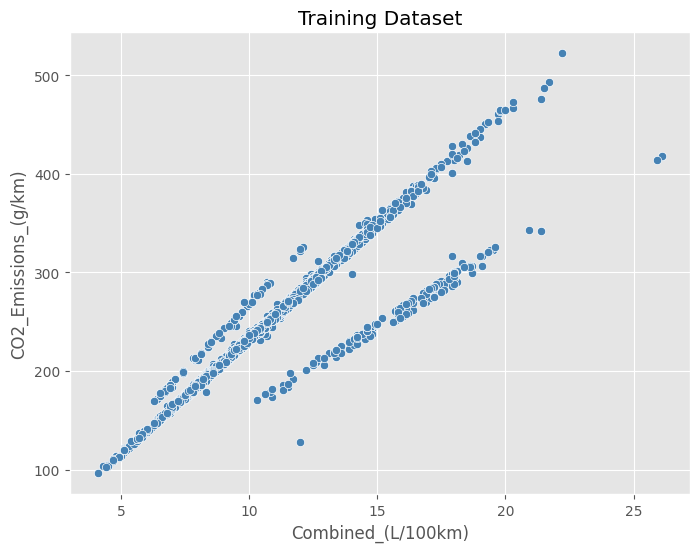

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Combined_(L/100km)', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

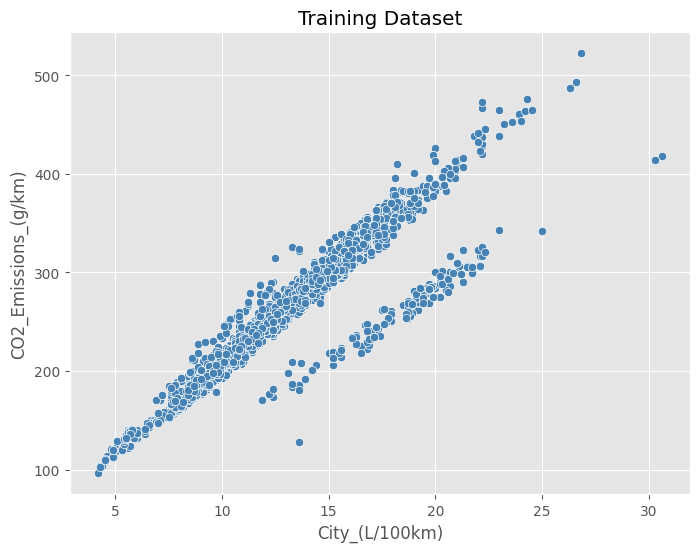

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='City_(L/100km)', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

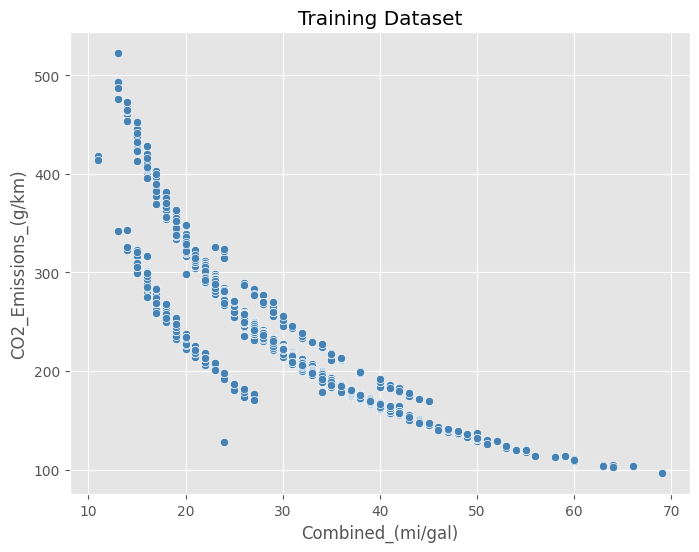

In [110]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Combined_(mi/gal)', y='CO2_Emissions_(g/km)', color='steelblue')
plt.title('Training Dataset')
plt.show()

In [111]:
# Generate descriptive statistics for the DataFrame (e.g., min, max, mean, std deviation, and quartiles).
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Model_Year,4344.0,2016.978361,1.411766,2015.0,2016.0,2017.0,2018.0,2019.0
Displacement_(L),4344.0,3.120143,1.342026,0.9,2.0,3.0,3.6,8.4
Cylinders,4344.0,5.572514,1.827790,3.0,4.0,6.0,6.0,16.0
City_(L/100km),4344.0,12.443669,3.374058,4.2,10.0,12.0,14.4,30.6
Highway_(L/100km),4344.0,8.954857,2.106430,4.0,7.4,8.6,10.1,20.6
Combined_(L/100km),4344.0,10.873297,2.769696,4.1,8.9,10.5,12.5,26.1
Combined_(mi/gal),4344.0,27.642726,7.086315,11.0,23.0,27.0,32.0,69.0
CO2_Emissions_(g/km),4344.0,249.328039,57.495959,96.0,207.0,245.0,285.0,522.0
CO2_Index,3457.0,4.789991,1.642140,1.0,4.0,5.0,6.0,10.0
Smog_Index,2581.0,4.641999,1.844666,1.0,3.0,5.0,6.0,8.0


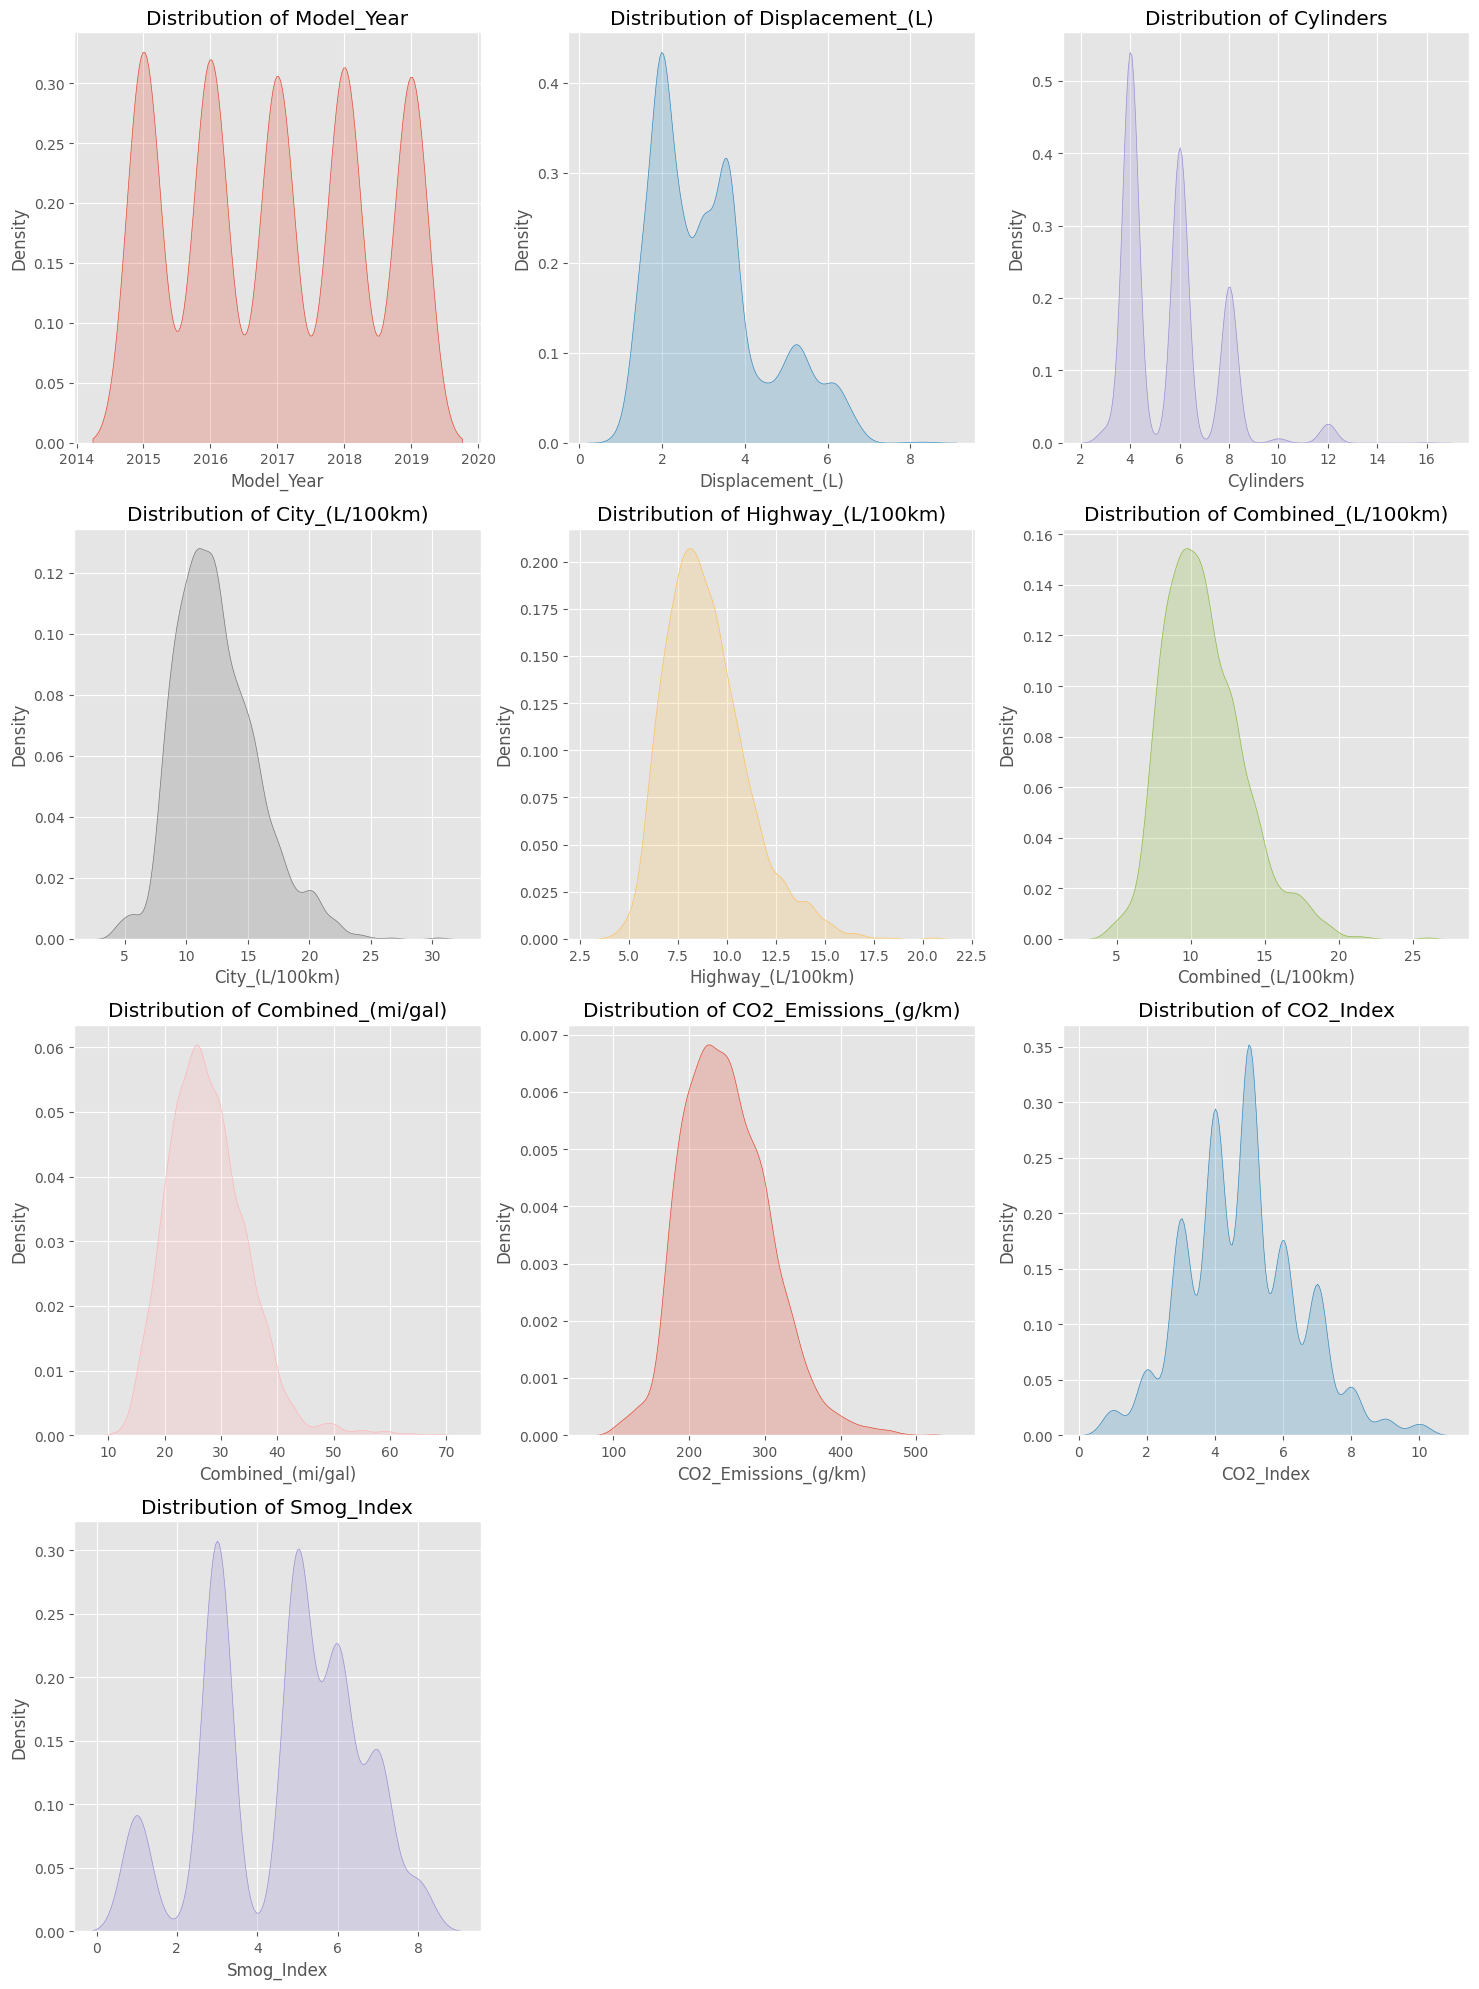

In [112]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns

# Calculate number of rows needed
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plotting distribution for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


'Model Year', 'Brand', 'Model', 'Vehicle Category', 'Displacement (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mi/gal)',
       'CO2 Emissions (g/km)'

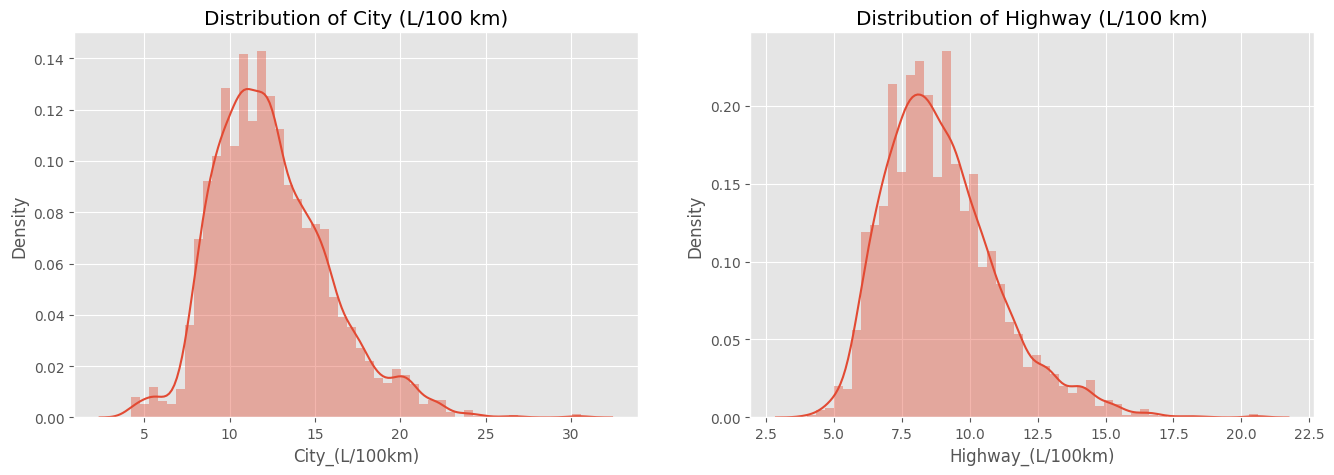

In [113]:
import warnings
warnings.filterwarnings('ignore')

# Set up the figure
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.distplot(data['City_(L/100km)'])
plt.title('Distribution of City (L/100 km)')
plt.subplot(1, 2, 2)
sns.distplot(data['Highway_(L/100km)'])
plt.title('Distribution of Highway (L/100 km)')
plt.show()

#### Check Outliers

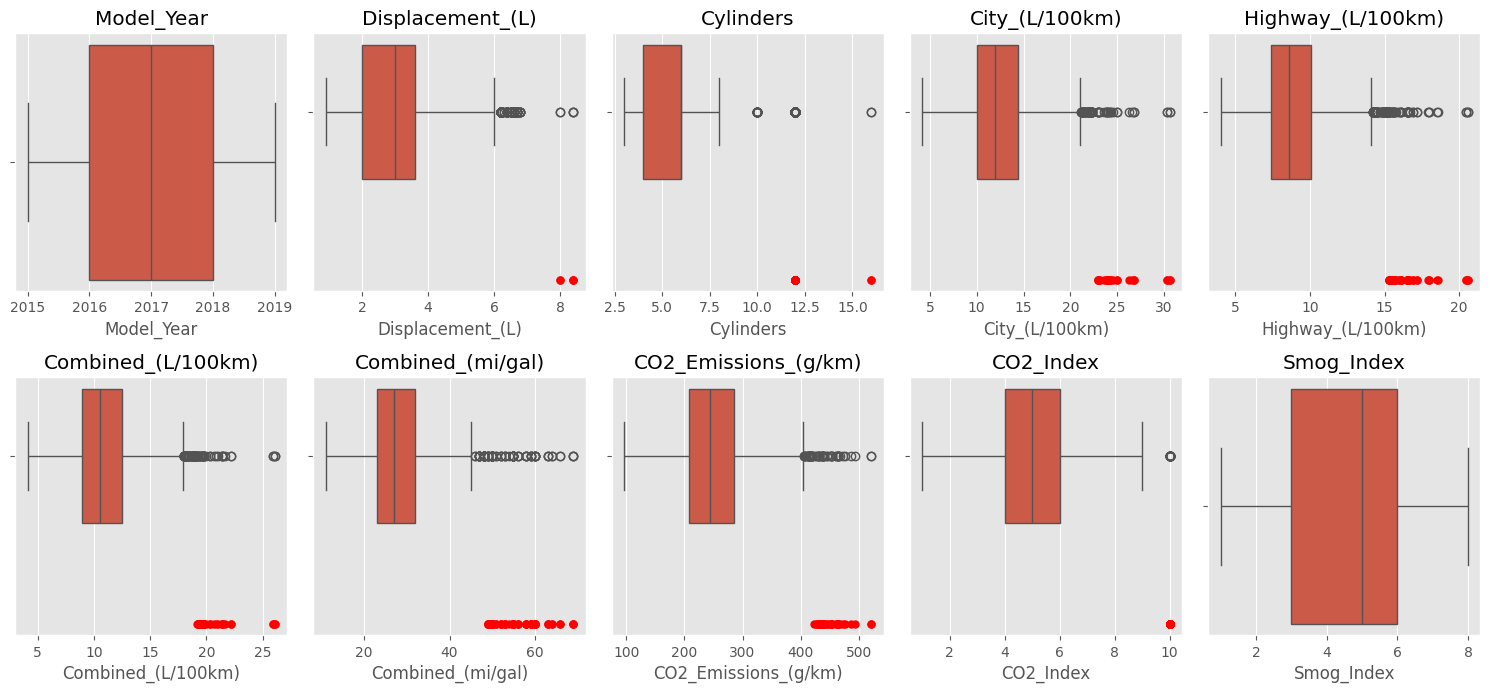

In [114]:
numerical_columns = train.select_dtypes(include=['int', 'float']).columns

# # Calculate the number of rows needed based on the number of numerical columns
# num_rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)

# # Set up the figure and subplots
# plt.figure(figsize=(18, 5 * num_rows))

# Set up the figure and subplots
plt.figure(figsize=(15, 10))

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=data[column], orient='v')
    plt.title(column)

    # Calculate upper and lower bounds for outliers
    mean = data[column].mean()
    std = data[column].std()
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Mark outliers
    outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
    plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)  # Mark outliers as red dots

plt.tight_layout()
plt.show()


#### Removing outliers

In [115]:
numerical_columns = train.select_dtypes(include=['int', 'float']).columns

# Create a copy of the original DataFrame
train_no_outliers = train.copy()

# Remove outliers from each numerical column (excluding 'Model_Year' and 'Smog_Index')
for column in numerical_columns:
    if column not in ['Model_Year', 'Smog_Index','CO2_Index', 'Brand']:  # Skip specified columns
        mean = train[column].mean()
        std = train[column].std()
        upper_bound = mean + 3 * std  # Adjust the multiplier as needed
        lower_bound = mean - 3 * std  # Adjust the multiplier as needed

        # Filter out rows with values outside the bounds
        train_no_outliers = train_no_outliers[(train_no_outliers[column] <= upper_bound) & (train_no_outliers[column] >= lower_bound)]

# Print the shape of the original and modified DataFrames to see the difference
print("Original DataFrame shape:", train.shape)
print("DataFrame without outliers shape:", train_no_outliers.shape)


Original DataFrame shape: (4344, 15)
DataFrame without outliers shape: (4152, 15)


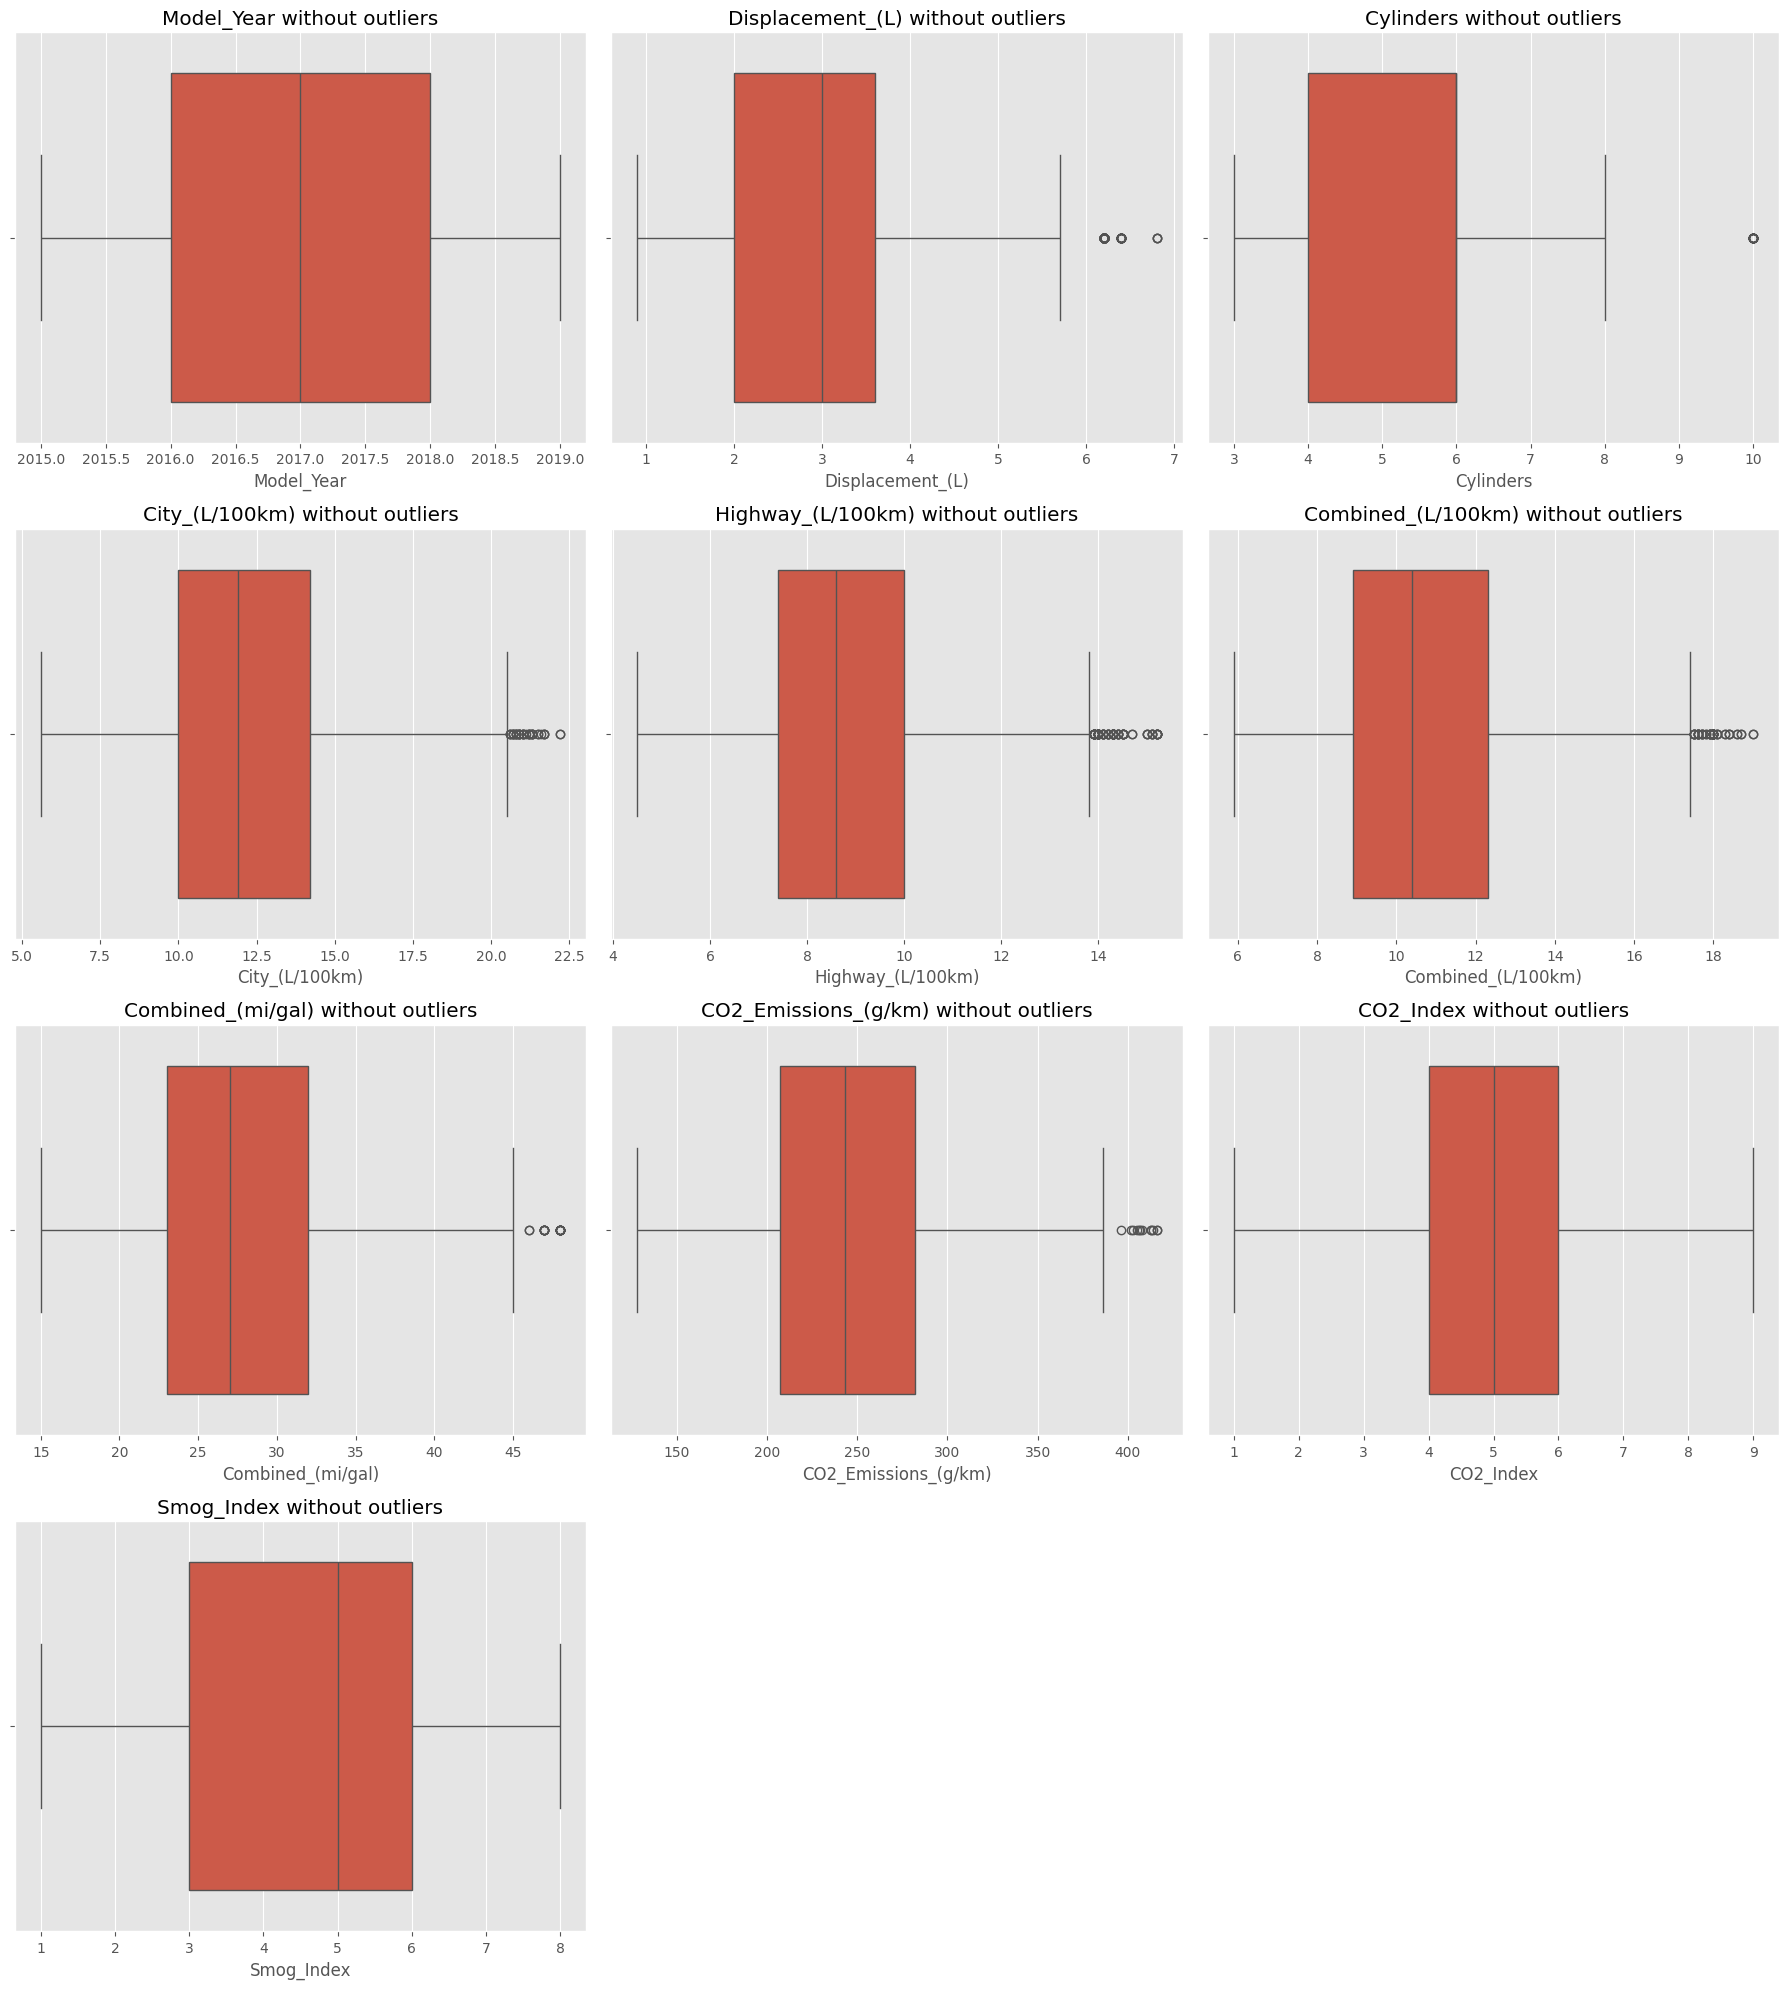

In [116]:
# Plot box plots for numerical columns without outliers
plt.figure(figsize=(18, 5 * num_rows))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=train_no_outliers[column], orient='v')
    plt.title(f"{column} without outliers")

plt.tight_layout()
plt.show()


In [117]:
train_no_outliers.head(5)

,Model_Year,Brand,Model,Vehicle_Category,Displacement_(L),Cylinders,Transmission,Fuel_Type,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km),CO2_Index,Smog_Index
5015,2019,Lexus,RX 350 AWD,Small SUV,3.5,6,AS8,X,12.2,9.0,10.8,26,252,4.0,5.0
1612,2016,GMC,Yukon 4WD FFV,Regular SUV,5.3,8,A6,X,15.2,10.8,13.2,21,310,4.0,NaN
2683,2017,GMC,Sierra 4WD,Regular Pickup Truck,6.2,8,A8,Z,16.0,11.7,14.1,20,330,3.0,5.0
652,2015,Kia,Rio,Compact,1.6,4,M6,X,8.7,6.4,7.7,37,177,NaN,NaN
3229,2017,Toyota,Tacoma,Small Pickup Truck,2.7,4,AS6,X,12.1,10.1,11.2,25,263,4.0,7.0


In [118]:
train_no_outliers.isna().sum()

Model_Year                 0
Brand                      0
Model                      0
Vehicle_Category           0
Displacement_(L)           0
Cylinders                  0
Transmission               0
Fuel_Type                  0
City_(L/100km)             0
Highway_(L/100km)          0
Combined_(L/100km)         0
Combined_(mi/gal)          0
CO2_Emissions_(g/km)       0
CO2_Index                851
Smog_Index              1690
dtype: int64

In [119]:
train_no_outliers.drop(columns=['CO2_Index', 'Smog_Index', 'Model_Year'], inplace=True)
train_no_outliers.head()

,Brand,Model,Vehicle_Category,Displacement_(L),Cylinders,Transmission,Fuel_Type,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km)
5015,Lexus,RX 350 AWD,Small SUV,3.5,6,AS8,X,12.2,9.0,10.8,26,252
1612,GMC,Yukon 4WD FFV,Regular SUV,5.3,8,A6,X,15.2,10.8,13.2,21,310
2683,GMC,Sierra 4WD,Regular Pickup Truck,6.2,8,A8,Z,16.0,11.7,14.1,20,330
652,Kia,Rio,Compact,1.6,4,M6,X,8.7,6.4,7.7,37,177
3229,Toyota,Tacoma,Small Pickup Truck,2.7,4,AS6,X,12.1,10.1,11.2,25,263


In [120]:
train_no_outliers.shape

(4152, 12)

In [121]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Model_Year,4344.0,2016.978361,1.411766,2015.0,2016.0,2017.0,2018.0,2019.0
Displacement_(L),4344.0,3.120143,1.342026,0.9,2.0,3.0,3.6,8.4
Cylinders,4344.0,5.572514,1.827790,3.0,4.0,6.0,6.0,16.0
City_(L/100km),4344.0,12.443669,3.374058,4.2,10.0,12.0,14.4,30.6
Highway_(L/100km),4344.0,8.954857,2.106430,4.0,7.4,8.6,10.1,20.6
Combined_(L/100km),4344.0,10.873297,2.769696,4.1,8.9,10.5,12.5,26.1
Combined_(mi/gal),4344.0,27.642726,7.086315,11.0,23.0,27.0,32.0,69.0
CO2_Emissions_(g/km),4344.0,249.328039,57.495959,96.0,207.0,245.0,285.0,522.0
CO2_Index,3457.0,4.789991,1.642140,1.0,4.0,5.0,6.0,10.0
Smog_Index,2581.0,4.641999,1.844666,1.0,3.0,5.0,6.0,8.0


In [122]:
train_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Displacement_(L),4152.0,3.037645,1.241647,0.9,2.0,3.0,3.6,6.8
Cylinders,4152.0,5.418834,1.549990,3.0,4.0,6.0,6.0,10.0
City_(L/100km),4152.0,12.267076,2.955659,5.6,10.0,11.9,14.2,22.2
Highway_(L/100km),4152.0,8.848964,1.890141,4.5,7.4,8.6,10.0,15.2
Combined_(L/100km),4152.0,10.728565,2.443278,5.9,8.9,10.4,12.3,19.0
Combined_(mi/gal),4152.0,27.659923,6.171011,15.0,23.0,27.0,32.0,48.0
CO2_Emissions_(g/km),4152.0,246.403902,50.343507,128.0,207.0,243.0,282.0,416.0


In [123]:
numerical_train = train_no_outliers.select_dtypes(include = ['int', 'float']).copy()
numerical_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Displacement_(L),4152.0,3.037645,1.241647,0.9,2.0,3.0,3.6,6.8
Cylinders,4152.0,5.418834,1.549990,3.0,4.0,6.0,6.0,10.0
City_(L/100km),4152.0,12.267076,2.955659,5.6,10.0,11.9,14.2,22.2
Highway_(L/100km),4152.0,8.848964,1.890141,4.5,7.4,8.6,10.0,15.2
Combined_(L/100km),4152.0,10.728565,2.443278,5.9,8.9,10.4,12.3,19.0
Combined_(mi/gal),4152.0,27.659923,6.171011,15.0,23.0,27.0,32.0,48.0
CO2_Emissions_(g/km),4152.0,246.403902,50.343507,128.0,207.0,243.0,282.0,416.0


### Check Missing Value

In [124]:
train_no_outliers.isna().sum()

Brand                   0
Model                   0
Vehicle_Category        0
Displacement_(L)        0
Cylinders               0
Transmission            0
Fuel_Type               0
City_(L/100km)          0
Highway_(L/100km)       0
Combined_(L/100km)      0
Combined_(mi/gal)       0
CO2_Emissions_(g/km)    0
dtype: int64

# Data Transformation

In [125]:
numeric_columns = train_no_outliers.select_dtypes(include=['int', 'float'])

# Check for negative values
if (numeric_columns < 0).any().any():
    print("There are negative values in the DataFrame.")
else:
    print("There are no negative values in the DataFrame.")


There are no negative values in the DataFrame.


In [126]:
non_skewed_df = train_no_outliers.select_dtypes(include=['int', 'float'])
non_skewed_df.skew()

Displacement_(L)        0.807880
Cylinders               0.558269
City_(L/100km)          0.595285
Highway_(L/100km)       0.721525
Combined_(L/100km)      0.635228
Combined_(mi/gal)       0.432471
CO2_Emissions_(g/km)    0.368444
dtype: float64

In [127]:
df = numeric_columns.copy()
log_df = np.log(df)
log_df.head(5)

,Displacement_(L),Cylinders,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km)
5015,1.252763,1.791759,2.501436,2.197225,2.379546,3.258097,5.529429
1612,1.667707,2.079442,2.721295,2.379546,2.580217,3.044522,5.736572
2683,1.824549,2.079442,2.772589,2.459589,2.646175,2.995732,5.799093
652,0.470004,1.386294,2.163323,1.856298,2.041220,3.610918,5.176150
3229,0.993252,1.386294,2.493205,2.312535,2.415914,3.218876,5.572154


In [128]:
sqrt_df = np.sqrt(df)
sqrt_df.head(5)

,Displacement_(L),Cylinders,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km)
5015,1.870829,2.449490,3.492850,3.000000,3.286335,5.099020,15.874508
1612,2.302173,2.828427,3.898718,3.286335,3.633180,4.582576,17.606817
2683,2.489980,2.828427,4.000000,3.420526,3.754997,4.472136,18.165902
652,1.264911,2.000000,2.949576,2.529822,2.774887,6.082763,13.304135
3229,1.643168,2.000000,3.478505,3.178050,3.346640,5.000000,16.217275


In [129]:
cbrt_df = np.cbrt(df)
cbrt_df.head(5)

,Displacement_(L),Cylinders,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km)
5015,1.518294,1.817121,2.302078,2.080084,2.210419,2.962496,6.316360
1612,1.743513,2.000000,2.477125,2.210419,2.363332,2.758924,6.767899
2683,1.837091,2.000000,2.519842,2.270189,2.415867,2.714418,6.910423
652,1.169607,1.587401,2.056710,1.856636,1.974681,3.332222,5.614672
3229,1.392477,1.587401,2.295770,2.161592,2.237378,2.924018,6.406959


In [130]:
print("Skewnees for Log Transformation: ", log_df)
print("Skewnees for Square Root Transformation: ", sqrt_df)
print("Skewnees for Cube Root Transformation: ", cbrt_df)

Skewnees for Log Transformation:        Displacement_(L)  Cylinders  City_(L/100km)  Highway_(L/100km)  \
5015          1.252763   1.791759        2.501436           2.197225   
1612          1.667707   2.079442        2.721295           2.379546   
2683          1.824549   2.079442        2.772589           2.459589   
652           0.470004   1.386294        2.163323           1.856298   
3229          0.993252   1.386294        2.493205           2.312535   
...                ...        ...             ...                ...   
3092          0.470004   1.386294        2.163323           1.916923   
5191          1.308333   1.791759        2.564949           2.272126   
5226          1.722767   2.079442        2.721295           2.406945   
5390          0.405465   1.386294        2.054124           1.871802   
860           0.693147   1.386294        2.261763           1.987874   

      Combined_(L/100km)  Combined_(mi/gal)  CO2_Emissions_(g/km)  
5015            2.379546         

In [131]:
# Calculate missing values for each DataFrame
cbrt_missing_values = cbrt_df.isna().sum()
sqrt_missing_values = sqrt_df.isna().sum()
log_missing_values = log_df.isna().sum()

# Create a new DataFrame to store missing values
missing_values_df = pd.DataFrame({
    'cbrt_missing_values': cbrt_missing_values,
    'sqrt_missing_values': sqrt_missing_values,
    'log_missing_values': log_missing_values
})

# Display the DataFrame
missing_values_df

,cbrt_missing_values,sqrt_missing_values,log_missing_values
Displacement_(L),0,0,0
Cylinders,0,0,0
City_(L/100km),0,0,0
Highway_(L/100km),0,0,0
Combined_(L/100km),0,0,0
Combined_(mi/gal),0,0,0
CO2_Emissions_(g/km),0,0,0


# Feature Scaling

In [132]:
# Creating functions for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

def MinMax_Scaler (df, col_names):
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

def Robust_Scaler (df, col_names):
    features = df[col_names]
    scaler = RobustScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [133]:
numerical_columns.isin([0]).any().any()

False

#### Define dataframe for different scaler

In [134]:
col_names = numeric_columns.columns
df_ss = cbrt_df.copy()
df_ss = Standard_Scaler(df_ss, col_names)

In [135]:
df_mm = cbrt_df.copy()
df_mm = MinMax_Scaler(df_mm, col_names)

In [136]:
df_rs = cbrt_df.copy()
df_rs = Robust_Scaler(df_rs, col_names)

### Before Feature Scaling

In [137]:
non_skewed_df = train_no_outliers.select_dtypes(include=['int', 'float'])
non_skewed_df.skew()

Displacement_(L)        0.807880
Cylinders               0.558269
City_(L/100km)          0.595285
Highway_(L/100km)       0.721525
Combined_(L/100km)      0.635228
Combined_(mi/gal)       0.432471
CO2_Emissions_(g/km)    0.368444
dtype: float64

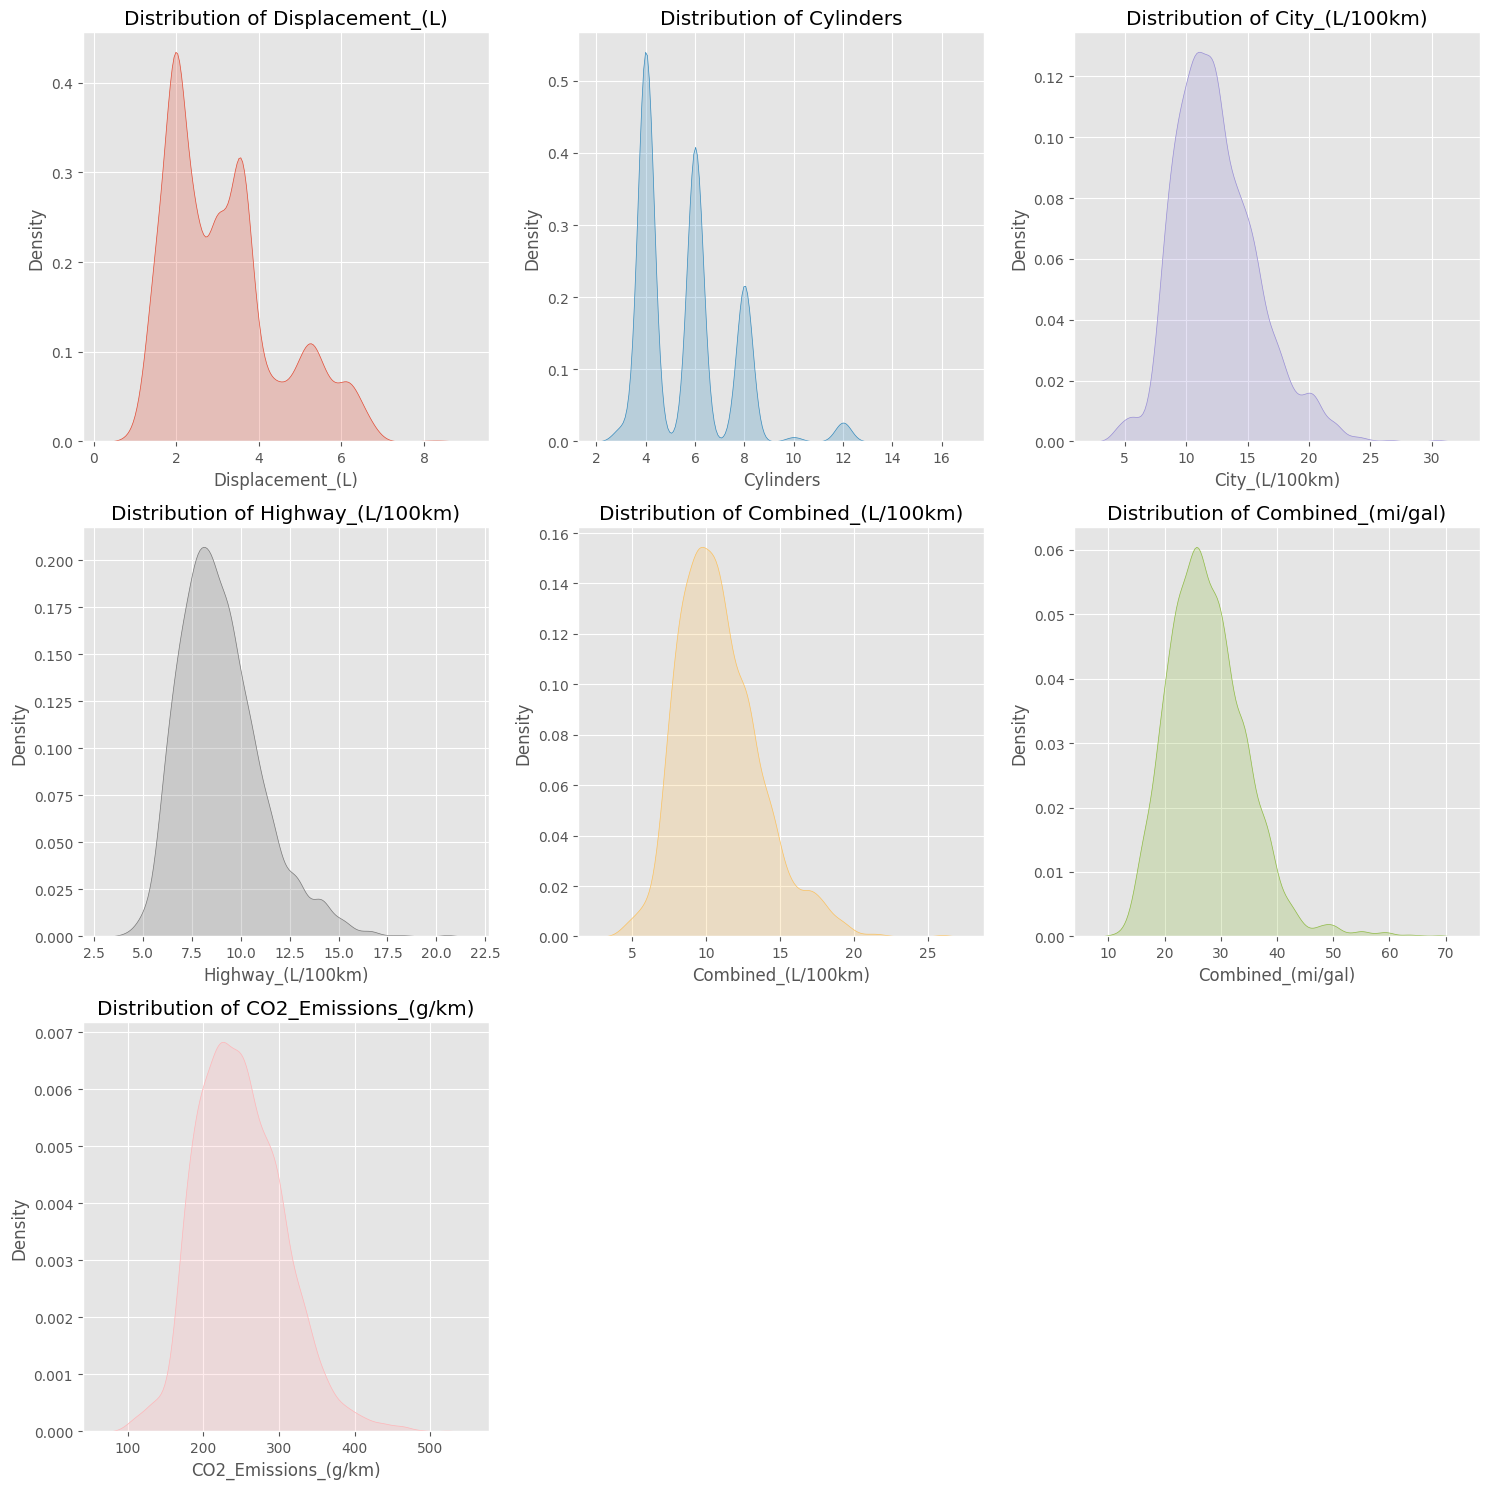

In [138]:
numerical_columns = train_no_outliers.select_dtypes(include=['int', 'float']).columns

# Calculate number of rows needed
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plotting distribution for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


We will choose Cube Root Transformation as it perform the best and it does not create missing values.

There are no difference in using different scaler, so we will be using Standard Scaler instead.

#### After Feature Scaling

In [139]:
ss_skewed_df = df_ss.select_dtypes(include=['int', 'float']).skew()
mm_skewed_df = df_mm.select_dtypes(include=['int', 'float']).skew()
rs_skewed_df = df_rs.select_dtypes(include=['int', 'float']).skew()

skewed_values_dataframe = pd.DataFrame ({
    'StandardScaler': ss_skewed_df,
    'MinMax Scaler': mm_skewed_df,
    'Robust Scaler': rs_skewed_df
})

skewed_values_dataframe

,StandardScaler,MinMax Scaler,Robust Scaler
Displacement_(L),0.340055,0.340055,0.340055
Cylinders,0.350577,0.350577,0.350577
City_(L/100km),0.207583,0.207583,0.207583
Highway_(L/100km),0.365398,0.365398,0.365398
Combined_(L/100km),0.274928,0.274928,0.274928
Combined_(mi/gal),0.080968,0.080968,0.080968
CO2_Emissions_(g/km),0.070095,0.070095,0.070095


In [140]:
skewed_df = df_ss.select_dtypes(include=['int', 'float'])
skewed_df.skew()

Displacement_(L)        0.340055
Cylinders               0.350577
City_(L/100km)          0.207583
Highway_(L/100km)       0.365398
Combined_(L/100km)      0.274928
Combined_(mi/gal)       0.080968
CO2_Emissions_(g/km)    0.070095
dtype: float64

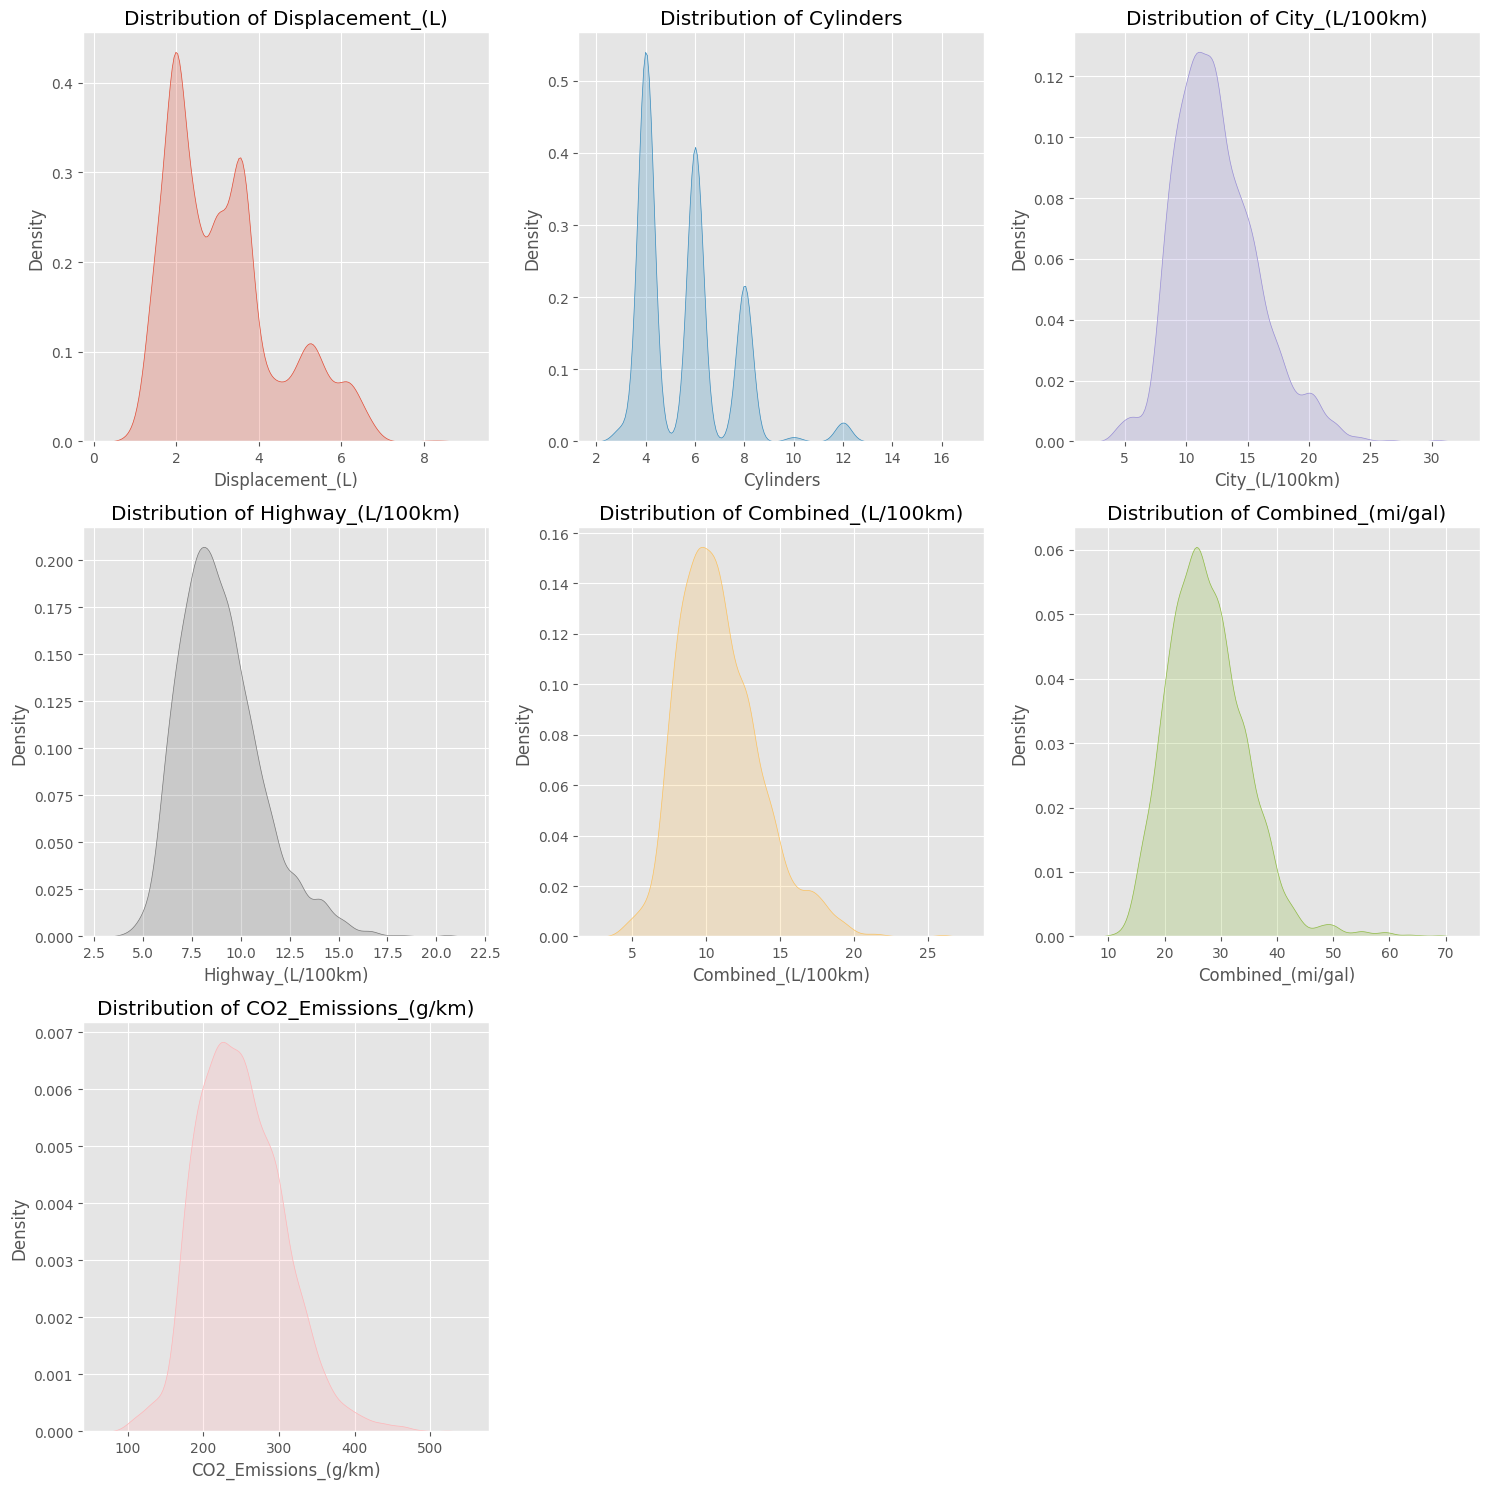

In [141]:
numerical_columns = df_ss.select_dtypes(include=['int', 'float']).columns

# Calculate number of rows needed
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 3)

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plotting distribution for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data[column], shade=True, color=f"C{i%10}", ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [142]:
# current dataframe --> skewed_df
'''
1. Done Data Transformation for skewed data using cube root transformation
2. Done Feature Scaling using StandardScaler
'''

'\n1. Done Data Transformation for skewed data using cube root transformation\n2. Done Feature Scaling using StandardScaler\n'

#### Clean testing set

In [143]:
# def clean_testing_set(test)
# This one I will do it later because we will use it only when in the last phase Model Evaluation -jx

# Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
linear_df = skewed_df.copy()

In [146]:
linear_df.head()

,Displacement_(L),Cylinders,City_(L/100km),Highway_(L/100km),Combined_(L/100km),Combined_(mi/gal),CO2_Emissions_(g/km)
5015,0.500486,0.464986,0.056527,0.151489,0.104746,-0.201481,0.178657
1612,1.679247,1.582686,1.015353,1.058033,1.035162,-1.110365,1.239157
2683,2.169016,1.582686,1.249340,1.473761,1.354821,-1.309073,1.573892
652,-1.324492,-0.938985,-1.287481,-1.402702,-1.329631,1.449229,-1.469346
3229,-0.158026,-0.938985,0.021980,0.718421,0.268782,-0.373274,0.391440


In [147]:
# Split the data into training and testing sets
X = linear_df.drop(['CO2_Emissions_(g/km)'], axis= 1).astype(np.float32)
y = linear_df["CO2_Emissions_(g/km)"].astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tabulate import tabulate
if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test are defined
    data_shapes = [
        ["X_train", X_train.shape],
        ["y_train", y_train.shape],
        ["X_test", X_test.shape],
        ["y_test", y_test.shape],
    ]
    print(tabulate(data_shapes, headers=["Data", "Shape"], tablefmt="grid"))


+---------+-----------+
| Data    | Shape     |
+=========+===========+
| X_train | (3321, 6) |
+---------+-----------+
| y_train | (3321,)   |
+---------+-----------+
| X_test  | (831, 6)  |
+---------+-----------+
| y_test  | (831,)    |
+---------+-----------+


In [148]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model's performance
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test,y_pred_lr)
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

# Print the evaluation metrics
print('Mean squared error (MSE): ', lr_mse)
print('Mean absolute error (MAE): ', lr_mae)
print('Root mean squared error (RMSE): ', lr_rmse)
print('R-squared:', lr_r2)
print()


Mean squared error (MSE):  0.10181483
Mean absolute error (MAE):  0.20463736
Root mean squared error (RMSE):  0.31908435
R-squared: 0.9038357448651144



In [149]:
# Train the linear regression model
def train_lr_model(X_train, y_train):
    # Initialize and train the linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    return lr_model

def evaluate_model(lr_model, X_train, y_train, X_test, y_test):
    # Evaluate the linear regression model
    train_mse = mean_squared_error(y_train, lr_model.predict(X_train))
    train_rmse = np.sqrt(train_mse)
    test_mse = mean_squared_error(y_test, lr_model.predict(X_test))
    test_rmse = np.sqrt(test_mse)
    r2_train = lr_model.score(X_train, y_train)
    lin_r2_score = cross_val_score(lr_model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, lin_r2_score

def predict_and_compare(lr_model, X, y):
    # Make predictions and compare with actual values
    pred = lr_model.predict(X)
    result_pred = pd.DataFrame({"Pred_Linear": pred, "Real_Value": y.values})
    result_pred["Pred_Linear"] = result_pred["Pred_Linear"].round(2)
    result_pred["Diff"] = result_pred["Pred_Linear"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

from tabulate import tabulate
if __name__ == "__main__":
    # Train the linear regression model
    lr_model = train_lr_model(X_train, y_train)

    # Evaluate the linear regression model
    train_rmse, test_rmse, r2_train, lin_r2_score = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

    # Print evaluation results in tabular format
    print("Linear Regression Results:")
    results_table = [
        ["Training RMSE", train_rmse],
        ["Testing RMSE", test_rmse],
        ["R^2 score on Training Data", r2_train],
        ["Cross-validated R^2 score", lin_r2_score],
    ]
    print(tabulate(results_table, headers=["Metric", "Value"], tablefmt="grid"))

    # Make predictions and compare
    linear_regression_pred, mean_diff = predict_and_compare(lr_model, X, y)

    # Print mean difference
    print("\nPrediction Comparison:")
    print(tabulate(linear_regression_pred.head(), headers="keys", tablefmt="grid"))

    print(f"\nMean Difference: {mean_diff}")

Linear Regression Results:
+----------------------------+----------+
| Metric                     |    Value |
+============================+==========+
| Training RMSE              | 0.300662 |
+----------------------------+----------+
| Testing RMSE               | 0.319084 |
+----------------------------+----------+
| R^2 score on Training Data | 0.908245 |
+----------------------------+----------+
| Cross-validated R^2 score  | 0.907645 |
+----------------------------+----------+

Prediction Comparison:
+----+---------------+--------------+------------+
|    |   Pred_Linear |   Real_Value |       Diff |
+====+===============+==============+============+
|  0 |          0.35 |     0.178657 |  0.171343  |
+----+---------------+--------------+------------+
|  1 |          1.3  |     1.23916  |  0.0608433 |
+----+---------------+--------------+------------+
|  2 |          1.42 |     1.57389  | -0.153892  |
+----+---------------+--------------+------------+
|  3 |         -1.44 |    -1

### Reference
1. https://www.kaggle.com/code/marcinrutecki/standardize-or-normalize-ultimate-answer

- Feature Engineering
  - ezra
  - linna
- Model Selection (5>)
- Model Training & Hypertuning
  - hui san
  - yi tong
  - jia wen
  
- Model Evaluation (RMSE)

- Slides
- Video (5mins)